In [5]:
#  Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import zipfile


In [6]:
#  2. Extract the CSV from ZIP
with zipfile.ZipFile("Sample - Superstore.csv.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [7]:
#  3. Load the Dataset
df = pd.read_csv("Sample - Superstore.csv", encoding='latin1')  # Use 'latin1' if UTF-8 fails
print("✅ Dataset Loaded Successfully!")
print(df.head())

✅ Dataset Loaded Successfully!
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-C

In [11]:
#  Remove Duplicates
df.drop_duplicates(inplace=True)

#  Fill Missing Values
df.fillna(df.median(numeric_only=True), inplace=True)

#  Convert 'Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

#  Dataset Overview
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   object        
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

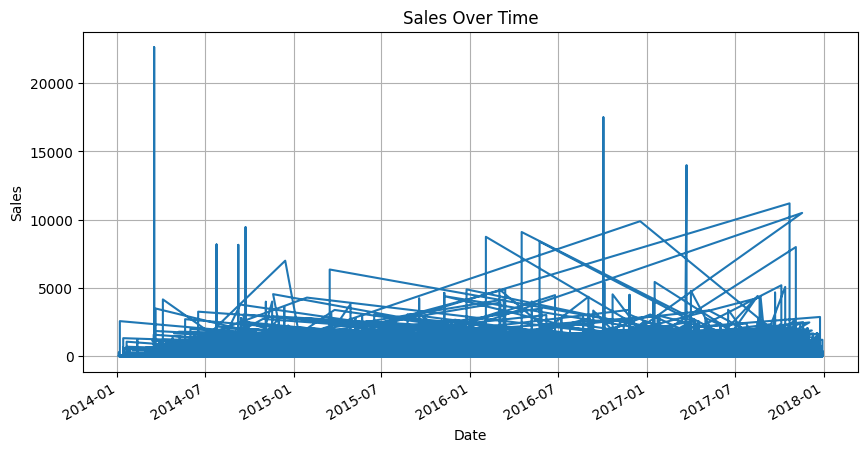

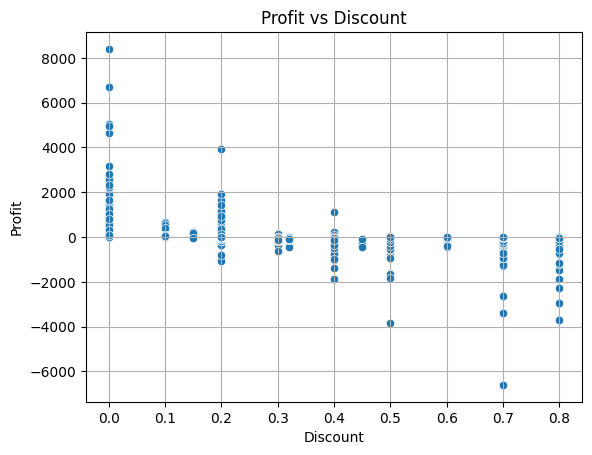

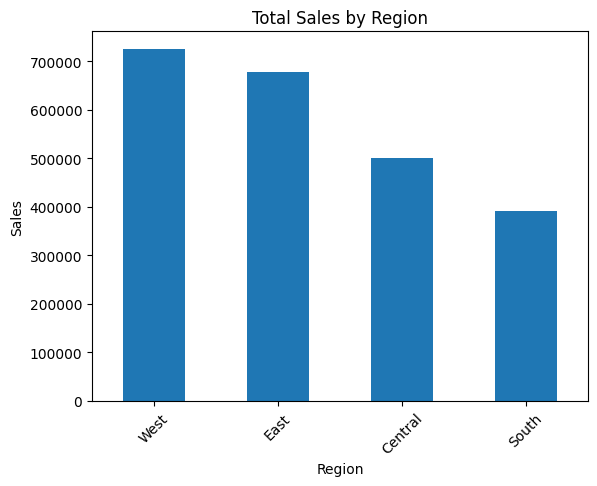

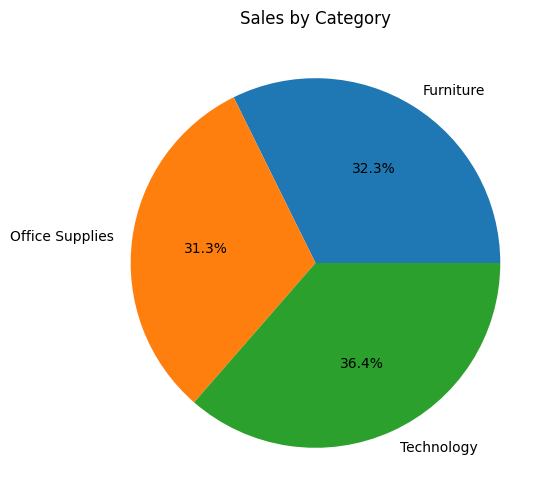

In [ ]:
#  1. Time Series Plot for Sales
df.set_index('Order Date')['Sales'].plot(figsize=(10, 5), title='Sales Over Time')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.grid(True)
plt.show()

#  2. Scatter Plot: Profit vs. Discount
sns.scatterplot(data=df, x='Discount', y='Profit')
plt.title('Profit vs Discount')
plt.grid(True)
plt.show()

#  3. Sales by Region (Bar Plot)
df.groupby('Region')['Sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Sales by Region')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

#  4. Sales by Category (Pie Chart)
df.groupby('Category')['Sales'].sum().plot(kind='pie', autopct='%1.1f%%', title='Sales by Category', figsize=(6, 6))
plt.ylabel('')
plt.show()


In [13]:
#  Select Features and Target
X = df[['Profit', 'Discount']]
y = df['Sales']

#  Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#  Train Model
model = LinearRegression()
model.fit(X_train, y_train)

#  Predict & Evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f" R² Score: {r2:.2f}")
print(f" Mean Squared Error: {mse:.2f}")


 R² Score: 0.37
 Mean Squared Error: 309665.30
